In [9]:
!pip uninstall -y pillow



Found existing installation: Pillow 8.2.0
Uninstalling Pillow-8.2.0:
  Successfully uninstalled Pillow-8.2.0


In [11]:
!pip install pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 4.1 MB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires requests<3,>=2.27, but you have requests 2.25.1 which is incompatible.


In [13]:

!pip install --upgrade matplotlib tensorflow keras pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.4
    Uninstalling matplotlib-3.8.4:
      Successfully uninstalled matplotlib-3.8.4
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


In [17]:
!pip uninstall -y matplotlib
!pip install matplotlib


Found existing installation: matplotlib 3.9.2
Uninstalling matplotlib-3.9.2:
  Successfully uninstalled matplotlib-3.9.2
  Using cached matplotlib-3.9.2-cp312-cp312-macosx_10_12_x86_64.whl.metadata (11 kB)
Using cached matplotlib-3.9.2-cp312-cp312-macosx_10_12_x86_64.whl (7.9 MB)


In [27]:
import pathlib
import tensorflow as tf

import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam # - Works
import random
from glob import glob

from tensorflow.keras.losses import SparseCategoricalCrossentropy

import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [31]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth = True
except Exception as ex:
    print(e)

[]


In [34]:
data_dir_train = pathlib.Path("/Users/rishitha/skinsense/two/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/Users/rishitha/skinsense/two/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [36]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [38]:
batch_size = 32
img_height = 180
img_width = 180
rnd_seed = 123
random.seed(rnd_seed)

In [40]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [42]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [44]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 106 files for validation.


In [46]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [52]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from pathlib import Path

# Assuming class_names is a list of class names and data_dir_train is a Path object
num_classes = len(class_names)
plt.figure(figsize=(10, 10))

for i in range(num_classes):
    plt.subplot(3, 3, i + 1)
    
    # Load the image from the file path
    image_path = list(data_dir_train.glob(class_names[i] + '/*.jpg'))[0]  # Take the first image
    image = img.imread(image_path)
    
    plt.title(class_names[i])
    plt.imshow(image)
    plt.axis('off')  # Hide the axis

plt.tight_layout()
plt.show()

    

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

In [54]:
!pip show matplotlib


Name: matplotlib
Version: 3.9.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: Unknown <matplotlib-users@python.org>
License: License agreement for matplotlib versions 1.3.0 and later

1. This LICENSE AGREEMENT is between the Matplotlib Development Team
("MDT"), and the Individual or Organization ("Licensee") accessing and
otherwise using matplotlib software in source or binary form and its
associated documentation.

2. Subject to the terms and conditions of this License Agreement, MDT
hereby grants Licensee a nonexclusive, royalty-free, world-wide license
to reproduce, analyze, test, perform and/or display publicly, prepare
derivative works, distribute, and otherwise use matplotlib
alone or in any derivative version, provided, however, that MDT's
License Agreement and MDT's notice of copyright, i.e., "Copyright (c)
2012- Matplotlib Development Team; All Rights Reserved" are retained in
matplotlib  alone or in

In [56]:
!pip uninstall -y matplotlib
!pip install matplotlib


Found existing installation: matplotlib 3.9.2
Uninstalling matplotlib-3.9.2:
  Successfully uninstalled matplotlib-3.9.2
  Using cached matplotlib-3.9.2-cp312-cp312-macosx_10_12_x86_64.whl.metadata (11 kB)
Using cached matplotlib-3.9.2-cp312-cp312-macosx_10_12_x86_64.whl (7.9 MB)


In [58]:
!pip install --upgrade matplotlib tensorflow keras pillow


In [60]:
!pip list | grep matplotlib
!pip list | grep pillow


matplotlib                        3.9.2
matplotlib-inline                 0.1.6
pillow                            10.4.0


In [62]:
pip cache purge


Files removed: 2220
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam # - Works
import random
from glob import glob
import seaborn as sns
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import matplotlib.image as img
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth = True
except Exception as ex:
    print(e)

[]


In [9]:
data_dir_train = pathlib.Path("/Users/rishitha/skinsense/two/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/Users/rishitha/skinsense/two/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [11]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [13]:
batch_size = 32
img_height = 180
img_width = 180
rnd_seed = 123
random.seed(rnd_seed)

In [15]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [17]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [19]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 106 files for validation.


In [21]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


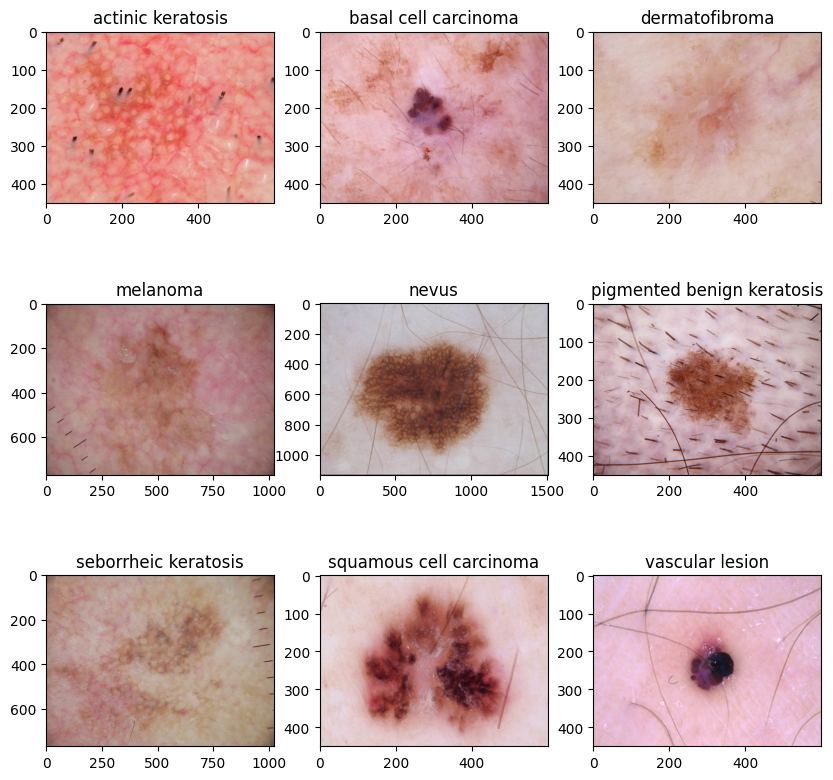

In [19]:
num_classes = len(class_names)
plt.figure(figsize=(10,10))
for i in range(num_classes):
  plt.subplot(3,3,i+1)
  image = img.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [21]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 180, 180, 3)
(32,)


2024-08-28 00:33:16.246090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [23]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models

num_classes = 9
model = models.Sequential([
    tf.keras.layers.Rescaling(1.0/255, input_shape=(img_height, img_width, 3)),
    
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(128, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(256, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(512, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(1024, activation="relu"),
    layers.Dense(num_classes, activation='softmax')
])

In [33]:
# Create Adam optimizer with learning rate
opt = Adam(learning_rate=0.001)

# Compile the model with the updated optimizer
model.compile(optimizer=opt,
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    13,108,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         9,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,686,025 (56.02 MB)

 Trainable params: 14,686,025 (56.02 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.2073 - loss: 2.0689 - val_accuracy: 0.2998 - val_loss: 1.8364
Epoch 2/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.3264 - loss: 1.8070 - val_accuracy: 0.3602 - val_loss: 1.7401
Epoch 3/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.3385 - loss: 1.8504 - val_accuracy: 0.4362 - val_loss: 1.6182
Epoch 4/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step - accuracy: 0.4172 - loss: 1.6338 - val_accuracy: 0.4228 - val_loss: 1.5737
Epoch 5/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 174s 3s/step - accuracy: 0.4241 - loss: 1.5773 - val_accuracy: 0.3758 - val_loss: 1.9261
Epoch 6/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step - accuracy: 0.4558 - loss: 1.5533 - val_accuracy: 0.4855 - val_loss: 1.4634
Epoch 7/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.5140 - loss: 1.3789 - val_accuracy: 0.5101 - val_loss: 1.4736
Epoch 8/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 215s 4s/step - accuracy: 0.5257 - loss: 1.3155 - val_accuracy: 0.5145 - v

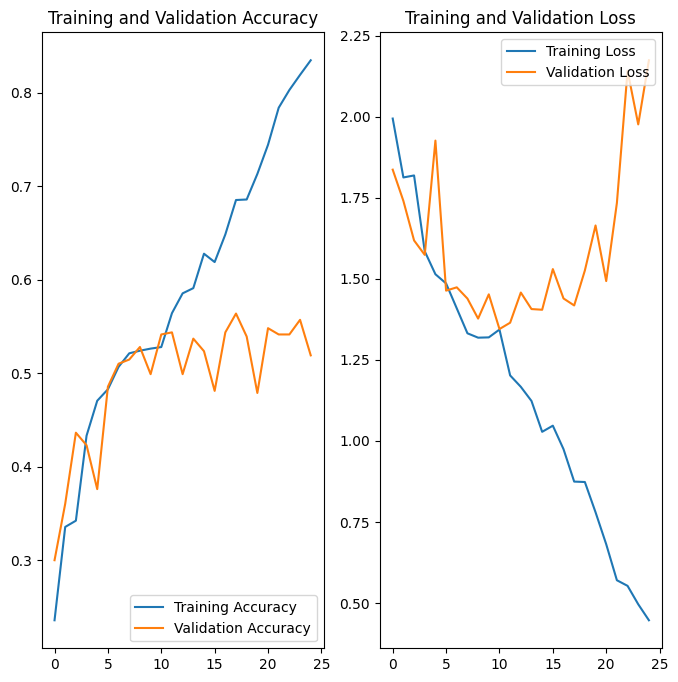

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
from tensorflow.keras import layers
from tensorflow import keras

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
  ]
)


2024-08-28 01:57:45.475547: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


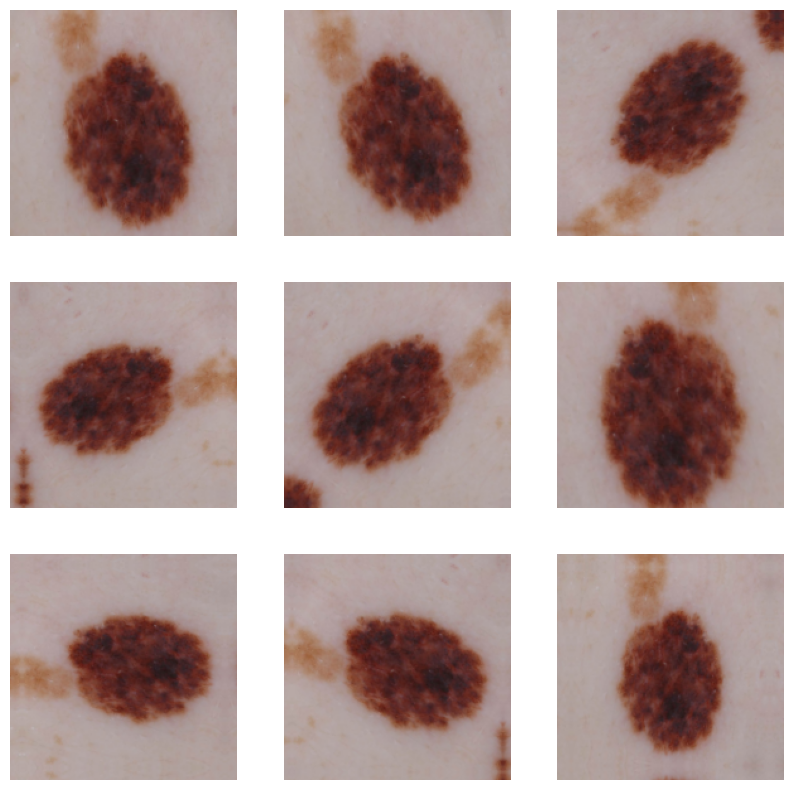

In [46]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [52]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Rescaling
from tensorflow.keras import layers

num_classes = 9

# Create the Sequential model
model = Sequential()

# Add data augmentation
model.add(data_augmentation)

# Add Rescaling layer
model.add(Rescaling(1.0/255, input_shape=(img_height, img_width, 3)))

# Add Convolutional layers and Max Pooling layers
model.add(Conv2D(32, 3, padding="same", activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3, padding="same", activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.15))

model.add(Conv2D(256, 3, padding="same", activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.20))

model.add(Conv2D(512, 3, padding="same", activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

# Flatten the output before passing it to the dense layers
model.add(Flatten())

# Add fully connected (dense) layers
model.add(Dense(1024, activation="relu"))
model.add(Dense(units=num_classes, activation='softmax'))


In [54]:
# Create Adam optimizer with learning rate
opt = Adam(learning_rate=0.001)

# Compile the model with the updated optimizer
model.compile(optimizer=opt,
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [56]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - accuracy: 0.1516 - loss: 2.2350 - val_accuracy: 0.2081 - val_loss: 1.9726
Epoch 2/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.2456 - loss: 1.9590 - val_accuracy: 0.2662 - val_loss: 1.8911
Epoch 3/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.3164 - loss: 1.8346 - val_accuracy: 0.3356 - val_loss: 1.8199
Epoch 4/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.3498 - loss: 1.7692 - val_accuracy: 0.4340 - val_loss: 1.6068
Epoch 5/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.3714 - loss: 1.6528 - val_accuracy: 0.4340 - val_loss: 1.5808
Epoch 6/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.4311 - loss: 1.5912 - val_accuracy: 0.4362 - val_loss: 1.6160
Epoch 7/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 225s 4s/step - accuracy: 0.4667 - loss: 1.4896 - val_accuracy: 0.4810 - val_loss: 1.5347
Epoch 8/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 7267s 132s/step - accuracy: 0.4692 - loss: 1.4552 - val_accuracy: 0.5235 

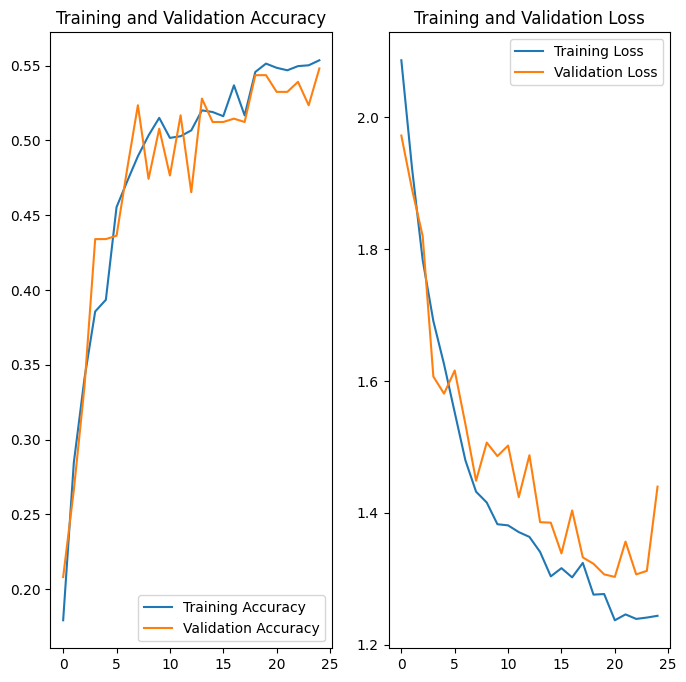

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

total training image count = 2239 

-------------------------------------
Class name =  actinic keratosis
count      =  114
proportion =  0.05091558731576597
-------------------------------------
Class name =  basal cell carcinoma
count      =  376
proportion =  0.16793211255024565
-------------------------------------
Class name =  dermatofibroma
count      =  95
proportion =  0.04242965609647164
-------------------------------------
Class name =  melanoma
count      =  438
proportion =  0.19562304600267977
-------------------------------------
Class name =  nevus
count      =  357
proportion =  0.15944618133095131
-------------------------------------
Class name =  pigmented benign keratosis
count      =  462
proportion =  0.20634211701652524
-------------------------------------
Class name =  seborrheic keratosis
count      =  77
proportion =  0.03439035283608754
-------------------------------------
Class name =  squamous cell carcinoma
count      =  181
proportion =  0.08083966056

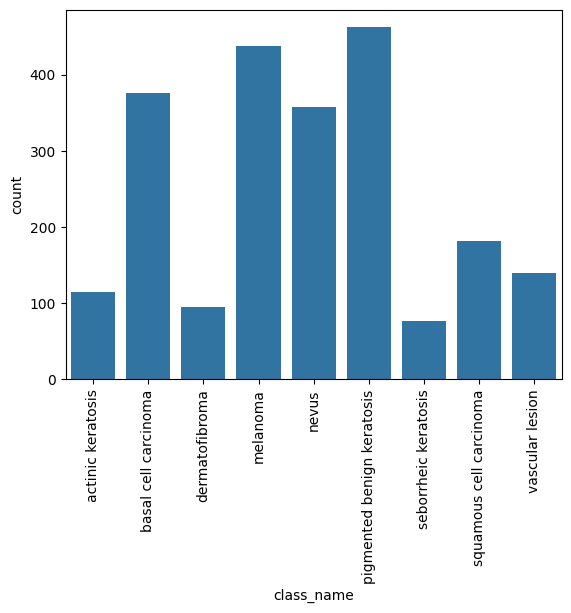

In [60]:
num_classes = len(class_names)
total = 0
all_count = []
class_name = []
for i in range(num_classes):
  count = len(list(data_dir_train.glob(class_names[i]+'/*.jpg')))
  total += count
print("total training image count = {} \n".format(total))
print("-------------------------------------")
for i in range(num_classes):
  count = len(list(data_dir_train.glob(class_names[i]+'/*.jpg')))
  print("Class name = ",class_names[i])
  print("count      = ",count)
  print("proportion = ",count/total)
  print("-------------------------------------")
  all_count.append(count)
  class_name.append(class_names[i])

temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

In [62]:
!pip install Augmentor

In [25]:
path_to_training_dataset = "/Users/rishitha/skinsense/two/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i, output_directory="/Users/rishitha/skinsense/two/working/data/"+i+"/output/")
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000)

Initialised with 114 image(s) found.
Output directory set to /Users/rishitha/skinsense/two/working/data/actinic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x14FB2C320>: 100%|█|


Initialised with 376 image(s) found.
Output directory set to /Users/rishitha/skinsense/two/working/data/basal cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1516ED820>: 100%|█|


Initialised with 95 image(s) found.
Output directory set to /Users/rishitha/skinsense/two/working/data/dermatofibroma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x14D9EDC40>: 100%|█|


Initialised with 438 image(s) found.
Output directory set to /Users/rishitha/skinsense/two/working/data/melanoma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3872x2592 at 0


Initialised with 357 image(s) found.
Output directory set to /Users/rishitha/skinsense/two/working/data/nevus/output/.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x14D74B1A0>: 100%|


Initialised with 462 image(s) found.
Output directory set to /Users/rishitha/skinsense/two/working/data/pigmented benign keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1516ED280>: 100%|█|


Initialised with 77 image(s) found.
Output directory set to /Users/rishitha/skinsense/two/working/data/seborrheic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x151195970>: 100%|█


Initialised with 181 image(s) found.
Output directory set to /Users/rishitha/skinsense/two/working/data/squamous cell carcinoma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1


Initialised with 139 image(s) found.
Output directory set to /Users/rishitha/skinsense/two/working/data/vascular lesion/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x14D9EE6C0>: 100%|█|


In [27]:
output_dir = pathlib.Path('/Users/rishitha/skinsense/two/working/data/')
image_count_train = len(list(output_dir.glob('*/output/*.jpg')))
print(image_count_train)

9000


total training image count = 9000 

-------------------------------------
Class name =  actinic keratosis
count      =  1000
proportion =  0.1111111111111111
-------------------------------------
Class name =  basal cell carcinoma
count      =  1000
proportion =  0.1111111111111111
-------------------------------------
Class name =  dermatofibroma
count      =  1000
proportion =  0.1111111111111111
-------------------------------------
Class name =  melanoma
count      =  1000
proportion =  0.1111111111111111
-------------------------------------
Class name =  nevus
count      =  1000
proportion =  0.1111111111111111
-------------------------------------
Class name =  pigmented benign keratosis
count      =  1000
proportion =  0.1111111111111111
-------------------------------------
Class name =  seborrheic keratosis
count      =  1000
proportion =  0.1111111111111111
-------------------------------------
Class name =  squamous cell carcinoma
count      =  1000
proportion =  0.11111111

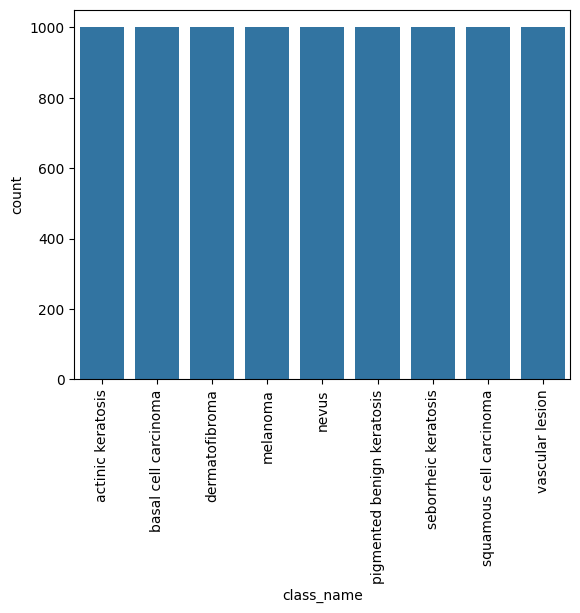

In [29]:
num_classes = len(class_names)
total = 0
all_count = []
class_name = []

for i in range(num_classes):
  count = len(list(output_dir.glob(class_names[i]+'/output/*.jpg')))
  total += count
print("total training image count = {} \n".format(total))
print("-------------------------------------")
for i in range(num_classes):
  count = len(list(output_dir.glob(class_names[i]+'/output/*.jpg')))
  print("Class name = ",class_names[i])
  print("count      = ",count)
  print("proportion = ",count/total)
  print("-------------------------------------")
  all_count.append(count)
  class_name.append(class_names[i])


temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

In [31]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9000 files belonging to 9 classes.
Using 7200 files for training.


In [33]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9000 files belonging to 9 classes.
Using 1800 files for validation.


In [35]:
print(train_ds.class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

num_classes = 9

model = Sequential([
    Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
    Conv2D(32, 3, padding="same", activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding="same", activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation='relu'),
    MaxPooling2D(),
    Dropout(0.15),
    Conv2D(256, 3, padding="same", activation='relu'),
    MaxPooling2D(),
    Dropout(0.20),
    Conv2D(512, 3, padding="same", activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(1024, activation="relu"),
    Dense(units=num_classes, activation='softmax')
])

In [41]:
# Create Adam optimizer with learning rate
opt = Adam(learning_rate=0.001)

# Compile the model with the updated optimizer
model.compile(optimizer=opt,
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [43]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
225/225 ━━━━━━━━━━━━━━━━━━━━ 462s 2s/step - accuracy: 0.1790 - loss: 2.1114 - val_accuracy: 0.3333 - val_loss: 1.6100
Epoch 2/25
225/225 ━━━━━━━━━━━━━━━━━━━━ 439s 2s/step - accuracy: 0.3916 - loss: 1.5135 - val_accuracy: 0.4500 - val_loss: 1.4492
Epoch 3/25
225/225 ━━━━━━━━━━━━━━━━━━━━ 461s 2s/step - accuracy: 0.4504 - loss: 1.3903 - val_accuracy: 0.4700 - val_loss: 1.3918
Epoch 4/25
225/225 ━━━━━━━━━━━━━━━━━━━━ 512s 2s/step - accuracy: 0.4751 - loss: 1.3180 - val_accuracy: 0.5417 - val_loss: 1.1465
Epoch 5/25
225/225 ━━━━━━━━━━━━━━━━━━━━ 474s 2s/step - accuracy: 0.5436 - loss: 1.1624 - val_accuracy: 0.6172 - val_loss: 1.0728
Epoch 6/25
225/225 ━━━━━━━━━━━━━━━━━━━━ 545s 2s/step - accuracy: 0.6149 - loss: 1.0251 - val_accuracy: 0.6506 - val_loss: 0.9097
Epoch 7/25
225/225 ━━━━━━━━━━━━━━━━━━━━ 467s 2s/step - accuracy: 0.6501 - loss: 0.9114 - val_accuracy: 0.7128 - val_loss: 0.7908
Epoch 8/25
225/225 ━━━━━━━━━━━━━━━━━━━━ 444s 2s/step - accuracy: 0.6945 - loss: 0.7923 - val_accu

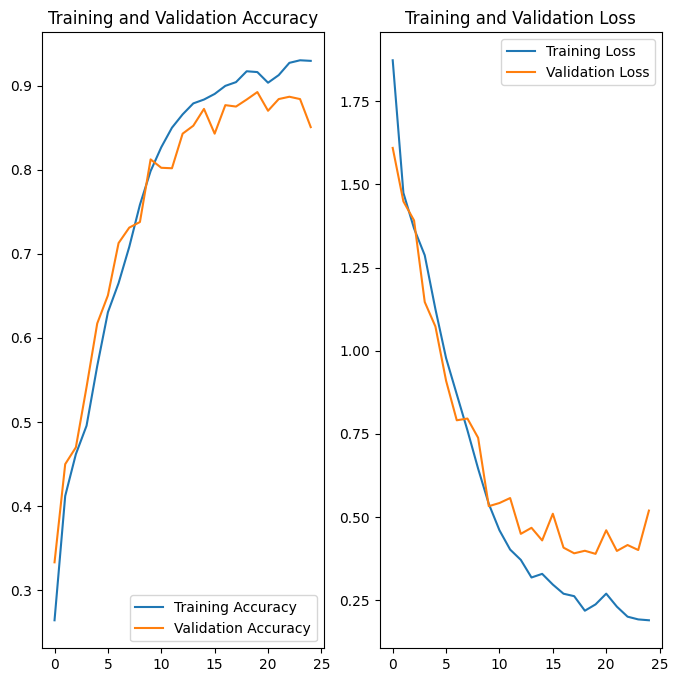

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [55]:
top_model_path = '/Users/rishitha/skinsense/two/working/cnn_fc_model.h5'
model.save(top_model_path)

In [57]:
top_model_weights_path = '/Users/rishitha/skinsense/two/working/cnn_model.weights.h5'
model.save_weights(top_model_weights_path)


In [59]:
(eval_loss, eval_accuracy) = model.evaluate(test_ds, batch_size=batch_size, \
                                            verbose=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 494ms/step - accuracy: 0.4206 - loss: 5.7573


In [61]:

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {}".format(eval_loss)) 

[INFO] accuracy: 40.57%
[INFO] Loss: 5.777266502380371
